<a href="https://colab.research.google.com/github/ragyeongyoon/coala-univ-ds/blob/main/titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Survival Count**
* 생존한 사람과 사망한 사람의 총 수를 비교한다.
* countplot: 수를 알려준다
> 사망자(0)가 생존자(1)보다 훨씬 많다.
---
**2. Survival Rate by Sex**
* 남성과 여성의 생존율을 비교한다.
* barplot: x축의 카테고리별로 y축의 평균을 계산해 막대 그래프로 그린다.
> 여성(Female)의 생존율이 남성(Male)보다 압도적으로 높다. 이는 '여성과 아이 먼저'라는 당시의 구조 원칙이 실제로 적용되었음을 시사하며, 성별이 생존을 예측하는 가장 중요한 특징 중 하나임을 의미한다.

---
**3. Survival Rate by Pclass**
* 1, 2, 3등석 객실 등급별 생존율을 비교한다.
* barplot: x축의 카테고리별로 y축 값의 평균을 계산해 막대그래프로 그린다.
> 1등석 승객의 생존율이 가장 높고, 3등석으로 갈수록 생존율이 급격히 낮아진다. 이는 사회경제적 지위가 생존에 큰 영향을 미쳤음을 보여주며, 객실 등급 역시 매우 중요한 예측 변수임을 알려준다.
---
**4. Age Distribution by Survival**
* 나이대별로 생존자와 사망자가 어떻게 분포되어 있는지 보여준다.
* histplot: 특정 데이터가 어떤 값에 얼마나 많이 분포하는지를 보여주는 히스토그램을 그린다. hue='Survived' 옵션으로 생존/사망 그룹을 다른 색으로 겹쳐서 보여준다.
> 아주 어린 아이들(10세 미만)은 다른 나이대에 비해 생존율이 눈에 띄게 높다. 반면, 20~30대 젊은 층에서는 사망자 수가 생존자 수를 크게 앞지른다.
---
**5. Survival Rate by Embarked Port**
* 탑승 항구(C=셰르부르, Q=퀸스타운, S=사우샘프턴)별 생존율을 비교한다.
* barplot: x축의 카테고리별로 y축 값의 평균을 계산해 막대그래프로 그린다.
> 셰르부르(C)에서 탑승한 승객의 생존율이 다른 두 항구보다 높게 나타난다. 이는 셰르부르에서 탑승한 승객 중에 1등석 승객이 많았기 때문일 수 있다. 이처럼 다른 변수와 연관 지어 생각해볼 수 있는 단서를 제공한다.
---
**6. Correlation Heatmap**
* 숫자 데이터들 간의 상관관계를 색상과 숫자로 한눈에 보여준다.
* heatmap: 행렬 형태의 데이터를 색깔로 시각화해준다. .corr() 함수로 계산된 변수 간 상관관계 행렬을 넣어주면 관계를 파악하기 쉽다.
> 붉은색은 양의 상관관계, 푸른색은 음의 상관관계를 의미한다. Survived는 Pclass와 강한 음의 상관관계(-0.34), Fare와 양의 상관관계(0.26)를 보인다. 즉, 등급이 높을수록(숫자가 작을수록), 요금을 많이 냈을수록 생존율이 높다는 의미다.

Mounted at /content/drive
Success: Data loaded from '/content/drive/MyDrive/05_kaggle_titanic/data/train.csv'


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


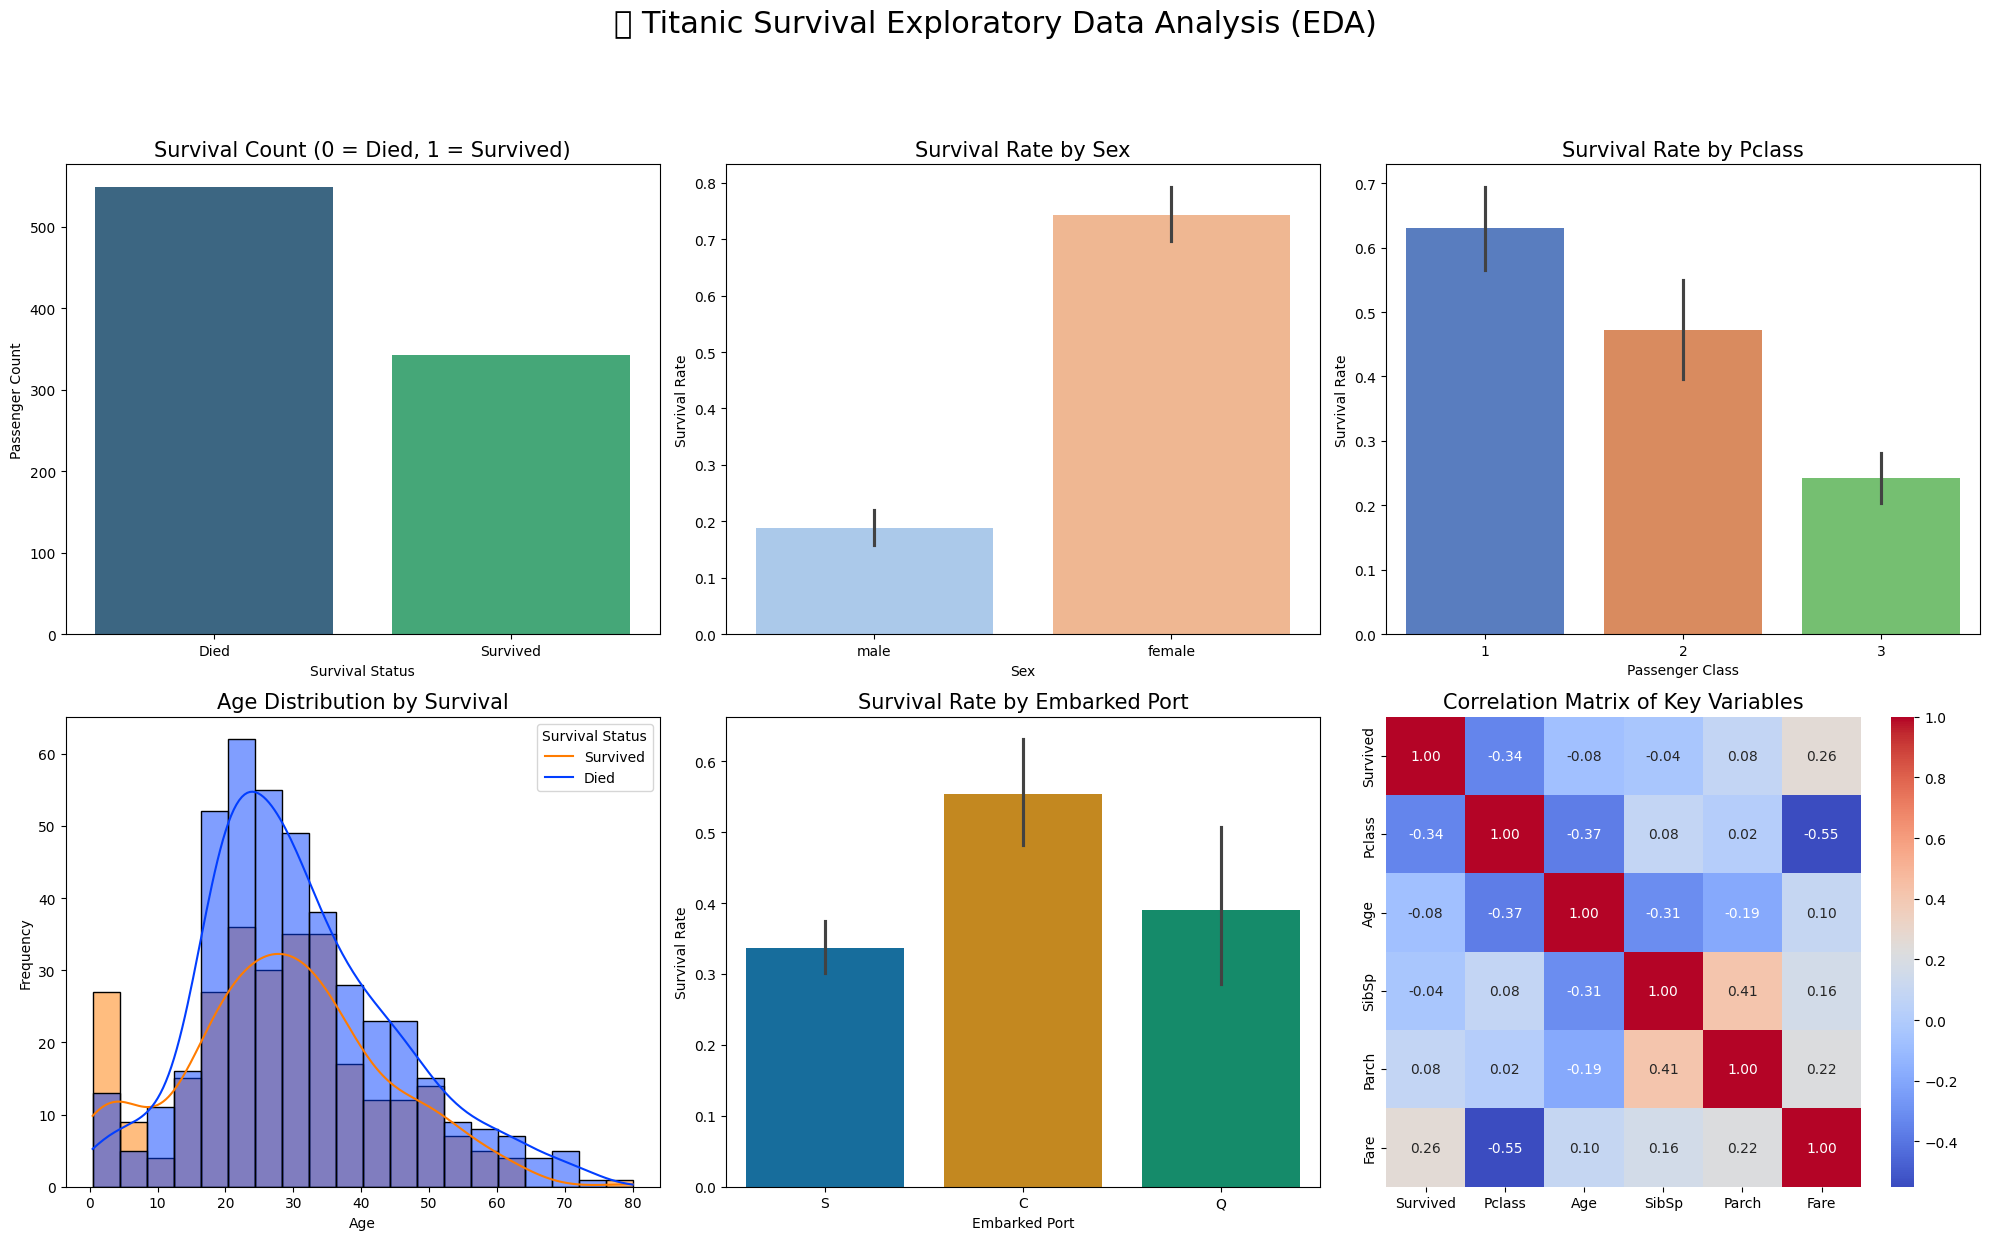

In [1]:
# ---------------------------------------------------
# STEP 1: Import Libraries & Mount Drive
# ---------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# ---------------------------------------------------
# STEP 2: Load Data
# ---------------------------------------------------
# Your previously confirmed file path
file_path = '/content/drive/MyDrive/05_kaggle_titanic/data/train.csv'

try:
    df_train = pd.read_csv(file_path)
    print(f"Success: Data loaded from '{file_path}'")
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'.")
    exit()

# ---------------------------------------------------
# STEP 3: Visualization (Warnings Fixed)
# ---------------------------------------------------
# Set up the plot grid
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('🚢 Titanic Survival Exploratory Data Analysis (EDA)', fontsize=22, y=1.03)


# --- Graph 1: Survival Count (Warning Fixed) ---
# FIX: Added hue='Survived' and legend=False
sns.countplot(ax=axes[0, 0], x='Survived', data=df_train, hue='Survived', palette='viridis', legend=False)
axes[0, 0].set_title('Survival Count (0 = Died, 1 = Survived)', fontsize=15)
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Died', 'Survived'])
axes[0, 0].set_xlabel('Survival Status')
axes[0, 0].set_ylabel('Passenger Count')


# --- Graph 2: Survival Rate by Sex (Warning Fixed) ---
# FIX: Added hue='Sex' and legend=False
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=df_train, hue='Sex', palette='pastel', legend=False)
axes[0, 1].set_title('Survival Rate by Sex', fontsize=15)
axes[0, 1].set_xlabel('Sex')
axes[0, 1].set_ylabel('Survival Rate')


# --- Graph 3: Survival Rate by Pclass (Warning Fixed) ---
# FIX: Added hue='Pclass' and legend=False
sns.barplot(ax=axes[0, 2], x='Pclass', y='Survived', data=df_train, hue='Pclass', palette='muted', legend=False)
axes[0, 2].set_title('Survival Rate by Pclass', fontsize=15)
axes[0, 2].set_xlabel('Passenger Class')
axes[0, 2].set_ylabel('Survival Rate')


# --- Graph 4: Age Distribution by Survival (No warning here) ---
sns.histplot(ax=axes[1, 0], data=df_train, x='Age', hue='Survived', kde=True, palette='bright')
axes[1, 0].set_title('Age Distribution by Survival', fontsize=15)
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend(title='Survival Status', labels=['Survived', 'Died'])


# --- Graph 5: Survival Rate by Embarked Port (Warning Fixed) ---
# FIX: Added hue='Embarked' and legend=False
sns.barplot(ax=axes[1, 1], x='Embarked', y='Survived', data=df_train, hue='Embarked', palette='colorblind', legend=False)
axes[1, 1].set_title('Survival Rate by Embarked Port', fontsize=15)
axes[1, 1].set_xlabel('Embarked Port')
axes[1, 1].set_ylabel('Survival Rate')


# --- Graph 6: Correlation Heatmap (No warning here) ---
heatmap_data = df_train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
sns.heatmap(ax=axes[1, 2], data=heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
axes[1, 2].set_title('Correlation Matrix of Key Variables', fontsize=15)


# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**피처 엔지니어링 (Feature Engineering)**

기존 데이터에서 더 의미 있는 새로운 특징(Feature)을 만들어냅니다. 모델의 예측력을 높이는 창의적인 과정입니다.

* FamilySize(가족 크기): SibSp(형제/배우자)와 Parch(부모/자녀)를 더해 '총 가족 수'라는 새로운 특징을 만듭니다
* IsAlone(혼자 탑승 여부): FamilySize가 1이면 '혼자', 아니면 '가족과 함께'라는 이진(binary) 특징을 만듭니다.
* Title(호칭): Name에서 'Mr', 'Mrs', 'Miss' 같은 호칭을 추출합니다. 이는 사회적 신분이나 결혼 여부를 나타내는 매우 강력한 특징이 됩니다.

**결측치(Missing Data) 채우기**

모델은 비어있는 값을 처리하지 못하므로, 적절한 값으로 채워줘야 합니다.

* Age(나이): 그냥 평균으로 채우기보다, 비슷한 그룹(예: 1등석 남성, 3등석 여성)의 중앙값으로 채우면 더 정확합니다.
* Embarked(탑승 항구): 데이터가 2개만 비어 있으므로, 가장 많이 등장하는 값으로 간단히 채웁니다.
* Fare(요금): test.csv에 비어있는 1개의 값은 해당 승객의 객실 등급에 맞는 요금의 중앙값으로 채웁니다.

**데이터 변환 (Categorical to Numerical)**

Sex, Embarked, 새로 만든 Title 같은 범주형(categorical) 데이터들을 0, 1, 2와 같은 숫자로 변환합니다.

In [2]:
# ---------------------------------------------------
# STEP 1: 라이브러리 불러오기 및 데이터 로드
# ---------------------------------------------------
import pandas as pd
import numpy as np

# 구글 드라이브 연결 및 파일 로드 (이전 단계에서 마운트 완료 가정)
try:
    train_df = pd.read_csv('/content/drive/MyDrive/05_kaggle_titanic/data/train.csv')
    test_df = pd.read_csv('/content/drive/MyDrive/05_kaggle_titanic/data/test.csv')
    print("✅ 훈련 데이터와 테스트 데이터를 성공적으로 불러왔습니다.")
except FileNotFoundError:
    print("❌ 파일 경로를 찾을 수 없습니다. 경로를 다시 확인해주세요.")
    exit()

# 나중에 submission 파일을 만들기 위해 test 데이터의 PassengerId를 저장해 둡니다.
test_passenger_id = test_df['PassengerId']

# 훈련/테스트 데이터를 합쳐서 전처리를 한번에 진행합니다.
# 이렇게 하면 두 데이터셋에 동일한 처리를 보장할 수 있습니다.
all_df = pd.concat([train_df, test_df], sort=False)

# ---------------------------------------------------
# STEP 2: 피처 엔지니어링 (Feature Engineering)
# ---------------------------------------------------
print("\n--- 피처 엔지니어링 시작 ---")

# 1. FamilySize: 총 가족 수
all_df['FamilySize'] = all_df['SibSp'] + all_df['Parch'] + 1
print("✔️ 'FamilySize' 피처 생성 완료")

# 2. IsAlone: 혼자 탑승 여부
all_df['IsAlone'] = (all_df['FamilySize'] == 1).astype(int)
print("✔️ 'IsAlone' 피처 생성 완료")

# 3. Title: 이름에서 호칭 추출
all_df['Title'] = all_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# 흔하지 않은 호칭들은 'Rare'로 통일
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Countess', 'Ms', 'Lady', 'Jonkheer', 'Don', 'Dona', 'Mme', 'Capt', 'Sir']
all_df['Title'] = all_df['Title'].replace(rare_titles, 'Rare')
print("✔️ 'Title' 피처 생성 완료")

# 4. Has_Cabin: Cabin 정보 유무
# Cabin 번호가 있으면 1, 없으면 (NaN) 0으로 변환
all_df['Has_Cabin'] = all_df['Cabin'].notna().astype(int)
print("✔️ 'Has_Cabin' 피처 생성 완료")


# ---------------------------------------------------
# STEP 3: 결측치(Missing Data) 채우기
# ---------------------------------------------------
print("\n--- 결측치 처리 시작 ---")

# 1. Fare (요금): test 데이터의 Fare 결측치 1개를 채웁니다.
# 3등석 승객이므로, 3등석 요금의 중간값으로 채웁니다.
pclass3_fare_median = all_df[all_df['Pclass'] == 3]['Fare'].median()
all_df['Fare'].fillna(pclass3_fare_median, inplace=True)
print(f"✔️ 'Fare' 결측치 1개를 {pclass3_fare_median}으로 채움")

# 2. Embarked (탑승 항구): 결측치 2개를 최빈값(가장 많이 나온 값)으로 채웁니다.
mode_embarked = all_df['Embarked'].mode()[0]
all_df['Embarked'].fillna(mode_embarked, inplace=True)
print(f"✔️ 'Embarked' 결측치 2개를 '{mode_embarked}' (최빈값)으로 채움")

# 3. Age (나이): 나이의 결측치가 가장 많고 중요합니다.
# '객실 등급'과 '성별'이 비슷한 그룹의 나이 중간값으로 채웁니다.
age_median = all_df.groupby(['Pclass', 'Sex'])['Age'].transform('median')
all_df['Age'].fillna(age_median, inplace=True)
print("✔️ 'Age' 결측치를 'Pclass'와 'Sex'가 비슷한 그룹의 중간값으로 채움")


# ---------------------------------------------------
# STEP 4: 데이터 변환 및 불필요한 컬럼 제거
# ---------------------------------------------------
print("\n--- 데이터 변환 및 컬럼 정리 시작 ---")

# 1. 범주형(Categorical) 데이터를 숫자(Numerical)로 변환
# Label Encoding: 간단하게 문자를 숫자로 매핑
all_df['Sex'] = all_df['Sex'].map({'male': 0, 'female': 1})
all_df['Embarked'] = all_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
all_df['Title'] = all_df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})
print("✔️ 'Sex', 'Embarked', 'Title' 컬럼을 숫자로 변환 완료")

# 2. 불필요한 컬럼 제거
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
all_df.drop(columns=drop_cols, inplace=True)
print(f"✔️ 불필요한 컬럼 제거 완료: {drop_cols}")

# ---------------------------------------------------
# STEP 5: 최종 데이터셋 분리 및 확인
# ---------------------------------------------------
# 전처리가 완료된 데이터셋을 다시 훈련(train)과 테스트(test)용으로 나눕니다.
train_processed = all_df[~all_df['Survived'].isnull()]
test_processed = all_df[all_df['Survived'].isnull()].drop(columns=['Survived'])

# 데이터 타입 변환 (Survived는 정수형으로)
train_processed['Survived'] = train_processed['Survived'].astype(int)

print("\n--- 모든 전처리 과정 완료! ---")
print("\n[전처리 후 훈련 데이터셋 (상위 5개)]")
display(train_processed.head())
print("\n[전처리 후 테스트 데이터셋 (상위 5개)]")
display(test_processed.head())

print("\n[최종 데이터셋 결측치 확인]")
print(train_processed.isnull().sum())

✅ 훈련 데이터와 테스트 데이터를 성공적으로 불러왔습니다.

--- 피처 엔지니어링 시작 ---
✔️ 'FamilySize' 피처 생성 완료
✔️ 'IsAlone' 피처 생성 완료
✔️ 'Title' 피처 생성 완료
✔️ 'Has_Cabin' 피처 생성 완료

--- 결측치 처리 시작 ---
✔️ 'Fare' 결측치 1개를 8.05으로 채움
✔️ 'Embarked' 결측치 2개를 'S' (최빈값)으로 채움
✔️ 'Age' 결측치를 'Pclass'와 'Sex'가 비슷한 그룹의 중간값으로 채움

--- 데이터 변환 및 컬럼 정리 시작 ---
✔️ 'Sex', 'Embarked', 'Title' 컬럼을 숫자로 변환 완료
✔️ 불필요한 컬럼 제거 완료: ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']

--- 모든 전처리 과정 완료! ---

[전처리 후 훈련 데이터셋 (상위 5개)]


/tmp/ipython-input-4279771161.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df['Fare'].fillna(pclass3_fare_median, inplace=True)
/tmp/ipython-input-4279771161.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title,Has_Cabin
0,0,3,0,22.0,7.2500,0,2,0,0,0
1,1,1,1,38.0,71.2833,1,2,0,2,1
2,1,3,1,26.0,7.9250,0,1,1,1,0
3,1,1,1,35.0,53.1000,0,2,0,2,1
4,0,3,0,35.0,8.0500,0,1,1,0,0



[전처리 후 테스트 데이터셋 (상위 5개)]


,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title,Has_Cabin
0,3,0,34.5,7.8292,2,1,1,0,0
1,3,1,47.0,7.0000,0,2,0,2,0
2,2,0,62.0,9.6875,2,1,1,0,0
3,3,0,27.0,8.6625,0,1,1,0,0
4,3,1,22.0,12.2875,0,3,0,2,0



[최종 데이터셋 결측치 확인]
Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
Has_Cabin     0
dtype: int64


**로지스틱 회귀 (Logistic Regression)**
데이터들 사이에 선형적인(직선 형태의) 경계선을 그어 두 그룹을 나눈다.

* **피처 스케일링**: 현재 우리 데이터에는 Age(0~80)나 Fare(0~512)처럼 값의 범위가 큰 피처와, Pclass(1~3)처럼 값의 범위가 작은 피처가 섞여 있습니다. 로지스틱 회귀는 값의 범위(스케일)가 큰 피처에 더 많은 영향을 받는 경향이 있습니다. 피처 스케일링은 모든 피처의 값 범위를 비슷한 수준으로 맞추어, 모델이 모든 피처를 공정하게 학습하도록 만들어주는 과정입니다. 이는 로지스틱 회귀와 같은 선형 모델의 성능 향상에 매우 효과적입니다.
  * StandardScaler를 사용하여 모든 피처를 평균 0, 표준편차 1인 표준정규분포로 변환합니다.

* 다항 피처를 추가해서 곡선 관계를 학습하도록 도와줬음에도 불구하고, 모델의 근본적인 한계는 '선형'입니다. 타이타닉 데이터의 생존/사망 패턴은 직선 하나로 나누기에는 너무 복잡합니다. 복잡한 곡선 그림을 수많은 짧은 직선으로 따라 그리려다 보니 한계가 있었던 것입니다.

**랜덤 포레스트 (Random Forest)**

하나의 똑똑한 모델이 아닌, 수많은 단순한 결정 나무(Decision Tree) 모델을 만듭니다. 각 나무는 약간씩 다른 데이터와 다른 특징을 참고하여 학습합니다. 최종 예측은 이 모든 나무의 예측을 **다수결(투표)**로 종합하여 결정합니다.

* 집단 지성의 힘 (앙상블): 전문가 한 명(결정 나무 하나)은 실수할 수 있지만, 수백 명의 전문가가 투표로 결정하면 실수가 줄어들고 훨씬 안정적이고 정확한 결정을 내릴 수 있습니다.

* 복잡한 패턴 학습 능력: 각 나무는 데이터의 복잡하고 비선형적인(곡선 형태의) 관계를 잘 포착할 수 있습니다. 수백 개의 나무가 모여 타이타닉 데이터에 숨겨진 "나이가 어리고, 1등석 여성이라면 생존율이 높다" 와 같은 복잡한 규칙들의 조합을 매우 잘 찾아냅니다.

* 과적합(Overfitting) 방지: 여러 나무가 서로의 단점을 보완해주기 때문에, 훈련 데이터에만 너무 치우쳐서 학습하는 과적합에 강한 모습을 보입니다.


In [6]:
# ---------------------------------------------------
# STEP 1: 라이브러리 불러오기
# ---------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# ---------------------------------------------------
# STEP 2: 이전 단계에서 전처리한 데이터 준비
# ---------------------------------------------------
# (만약 이전 세션이 끊겼다면, 데이터 전처리 코드를 다시 실행해야 합니다)
# 여기서는 train_processed 데이터가 이미 생성되었다고 가정합니다.

# 입력 변수(X)와 목표 변수(y)를 정의합니다.
X = train_processed.drop(columns=['Survived'])
y = train_processed['Survived']

# ---------------------------------------------------
# STEP 3: 훈련 데이터와 검증 데이터로 분리
# ---------------------------------------------------
# 데이터를 8:2 비율로 학습용 데이터와 검증용 데이터로 분리합니다.
# random_state=42: 재현성을 위해 분리 방식을 고정합니다.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"훈련 데이터 크기: {X_train.shape}, 검증 데이터 크기: {X_val.shape}")
print("---")

#피처 스케일링 적용
# ---------------------------------------------------
# 1. StandardScaler 객체 생성
scaler = StandardScaler()

# 2. 훈련 데이터(X_train)에 scaler를 학습(fit)시키고 변환(transform)
X_train_scaled = scaler.fit_transform(X_train)

# 3. 검증 데이터(X_val)는 학습 없이 변환(transform)만 적용
# (훈련 데이터에서 학습한 기준으로 동일하게 변환해야 함)
X_val_scaled = scaler.transform(X_val)

print("✅ 피처 스케일링이 완료되었습니다.")
print("---")

# ---------------------------------------------------
# STEP 4: 모델 학습 및 평가
# ---------------------------------------------------

# --- 모델 1: 로지스틱 회귀 (Logistic Regression) ---
# 1. 모델 생성
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
# 2. 모델 학습
lr_model.fit(X_train, y_train)
# 3. 예측
lr_predictions = lr_model.predict(X_val)
# 4. 평가 (정확도 계산)
lr_accuracy = accuracy_score(y_val, lr_predictions)
print(f"로지스틱 회귀 모델 정확도: {lr_accuracy:.4f}")


# --- 모델 2: 랜덤 포레스트 (Random Forest) ---
# 1. 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# 2. 모델 학습
rf_model.fit(X_train, y_train)
# 3. 예측
rf_predictions = rf_model.predict(X_val)
# 4. 평가 (정확도 계산)
rf_accuracy = accuracy_score(y_val, rf_predictions)
print(f"랜덤 포레스트 모델 정확도: {rf_accuracy:.4f}")
print("---")

if lr_accuracy > rf_accuracy:
    print("✅ 로지스틱 회귀 모델이 더 높은 정확도를 보입니다.")
else:
    print("✅ 랜덤 포레스트 모델이 더 높은 정확도를 보입니다.")

훈련 데이터 크기: (712, 9), 검증 데이터 크기: (179, 9)
---
✅ 피처 스케일링이 완료되었습니다.
---
로지스틱 회귀 모델 정확도: 0.8156
랜덤 포레스트 모델 정확도: 0.8492
---
✅ 랜덤 포레스트 모델이 더 높은 정확도를 보입니다.


**K-최근접 이웃 (KNN)**

새로운 승객이 나타나면, 기존 데이터에서 그 승객과 가장 비슷한 K명의 이웃을 찾습니다. 그리고 그 이웃들이 생존을 많이 했으면 '생존', 사망을 많이 했으면 '사망'으로 예측합니다.

* 거리 계산의 한계:  KNN은 피처가 많아질수록(우리는 다항 피처로 피처 수를 늘렸습니다) 거리 계산의 의미가 모호해져 성능이 떨어지는 **'차원의 저주'**에 민감합니다.

* 단순함: 모델이 데이터의 전체적인 패턴을 학습하는 것이 아니라, 국소적인 주변 정보에만 의존하기 때문에 전체를 아우르는 복잡한 규칙을 놓치기 쉽습니다.

**서포트 벡터 머신 (SVM)**

생존자 그룹과 사망자 그룹을 가장 안정적으로 나눌 수 있는 **'최적의 경계선(Optimal Hyperplane)'**을 찾는 것을 목표로 한다. 두 그룹 사이의 간격(Margin)을 최대로 만드는 선을 찾는다.

* SVM은 커널 트릭을 통해 비선형 데이터도 잘 처리할 수 있는 매우 강력한 모델입니다. 하지만, 최적의 성능을 내기 위해서는 **하이퍼파라미터 튜닝(C, gamma 값 조정)**이 매우 중요합니다.

* 우리가 사용한 기본 설정의 SVM은 랜덤 포레스트가 찾아낸 복잡한 규칙의 조합만큼 유연하게 대처하지 못했을 수 있습니다. 즉, 최적의 경계선을 너무 깔끔하게 찾으려다 보니, 데이터의 지저분하고 복잡한 현실을 약간 놓쳤을 수 있습니다.

In [7]:
# ---------------------------------------------------
# STEP 1: 추가 모델 라이브러리 불러오기
# ---------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
print("✅ KNN, SVM 모델을 위한 라이브러리를 불러왔습니다.")
print("---")

# ---------------------------------------------------
# STEP 2: 스케일링된 데이터로 추가 모델 학습 및 평가
# (이전 코드에서 X_train_scaled, X_val_scaled가 생성되었다고 가정합니다)
# ---------------------------------------------------

# --- 모델 3: K-최근접 이웃 (K-Nearest Neighbors, KNN) ---
# 1. 모델 생성 (가장 가까운 5개의 이웃을 참고)
knn_model = KNeighborsClassifier(n_neighbors=5)
# 2. 모델 학습 (반드시 스케일링된 데이터 사용!)
knn_model.fit(X_train_scaled, y_train)
# 3. 예측
knn_predictions = knn_model.predict(X_val_scaled)
# 4. 평가
knn_accuracy = accuracy_score(y_val, knn_predictions)
print(f"KNN 모델 정확도: {knn_accuracy:.4f}")


# --- 모델 4: 서포트 벡터 머신 (Support Vector Machine, SVM) ---
# 1. 모델 생성 (기본적인 C-Support Vector Classification 사용)
svm_model = SVC(random_state=42)
# 2. 모델 학습 (반드시 스케일링된 데이터 사용!)
svm_model.fit(X_train_scaled, y_train)
# 3. 예측
svm_predictions = svm_model.predict(X_val_scaled)
# 4. 평가
svm_accuracy = accuracy_score(y_val, svm_predictions)
print(f"SVM 모델 정확도: {svm_accuracy:.4f}")
print("---")

✅ KNN, SVM 모델을 위한 라이브러리를 불러왔습니다.
---
KNN 모델 정확도: 0.8101
SVM 모델 정확도: 0.8212
---


로지스틱 회귀 개선안

**1. 다항 피처(Polynomial Features) 생성**

* 스케일링을 했는데도 정확도가 그대로인 가장 큰 이유는, 현재 모델의 성능 한계가 '피처의 스케일' 문제가 아니라 '데이터의 비선형성' 문제이기 때문입니다.

* 로지스틱 회귀 모델이 '곡선' 관계를 학습하도록 도와주는 가장 강력한 방법이 바로 다항 피처 생성입니다. 기존 피처들을 서로 곱하거나 제곱하여 새로운 '고차원' 피처를 만들어내는 기술입니다.

  * 예시: Age, Fare 피처가 있다면, 새로운 피처: Age², Fare², Age * Fare 등을 인공적으로 생성합니다.

In [10]:
# ---------------------------------------------------
# STEP 1: 라이브러리 및 데이터 준비
# ---------------------------------------------------
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# 이전 단계에서 전처리한 데이터 준비
X = train_processed.drop(columns=['Survived'])
y = train_processed['Survived']

# ---------------------------------------------------
# STEP 2: 다항 피처 생성 및 스케일링
# ---------------------------------------------------
# 1. 2차 다항 피처를 생성하는 객체 만들기
poly = PolynomialFeatures(degree=2, include_bias=False)

# 2. X 데이터에 다항 피처 적용
X_poly = poly.fit_transform(X)

# 3. 다항 피처가 적용된 데이터에 스케일링 적용
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

print(f"✅ 다항 피처 생성 및 스케일링 완료!")
print(f"원본 피처 개수: {X.shape[1]}")
print(f"다항 피처 적용 후 개수: {X_poly_scaled.shape[1]}")
print("---")

# ---------------------------------------------------
# STEP 3: 최종 데이터로 모델 학습 및 평가
# ---------------------------------------------------
# 데이터를 학습용과 검증용으로 분리
X_train, X_val, y_train, y_val = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습 및 평가
lr_model_poly = LogisticRegression(max_iter=2000, class_weight='balanced')
lr_model_poly.fit(X_train, y_train)
lr_poly_predictions = lr_model_poly.predict(X_val)
lr_poly_accuracy = accuracy_score(y_val, lr_poly_predictions)

print(f"다항 피처 적용 후 로지스틱 회귀 모델 정확도: {lr_poly_accuracy:.4f}")

# 이전 랜덤 포레스트 정확도와 비교
print(f"참고: 랜덤 포레스트 모델 정확도: {rf_accuracy:.4f}")
print("---")



✅ 다항 피처 생성 및 스케일링 완료!
원본 피처 개수: 9
다항 피처 적용 후 개수: 54
---
다항 피처 적용 후 로지스틱 회귀 모델 정확도: 0.7989
참고: 랜덤 포레스트 모델 정확도: 0.8492
---


로지스틱 회귀 성능 개선안

**2. C값 튜닝**

다항 피처 생성 시 오히려 정확도가 떨어졌다. PolynomialFeatures로 피처 개수를 10개에서 65개로 크게 늘리자,  로지스틱 회귀 모델이 데이터의 미세한 노이즈까지 전부 '규칙'이라고 착각하고 외워 과적합이 발생했다.

로지스틱 회귀에서는 C라는 파라미터로 규제 강도를 조절한다. 특정 피처에 너무 큰 가중치를 부여하지 못하도록 페널티를 부과(C 값을 기본값 1.0 보다 낮춰 규제를 강화)하면 성능을 개선할 수 있다.

* C 값의 의미: C는 규제 강도의 역수

* C 값이 작을수록: 규제가 강해집니다. (모델을 단순하게 만들어서 과적합을 방지)

* C 값이 클수록: 규제가 약해집니다. (모델이 더 자유롭게 학습하도록 허용)


In [11]:
# C 값 튜닝으로 최적의 모델 찾기
# ---------------------------------------------------
# 테스트해 볼 C 값 후보들
c_candidates = [0.01, 0.1, 1, 10, 100]

best_accuracy = 0
best_c = 0

print("--- 하이퍼파라미터 C 튜닝 시작 ---")

# 데이터를 학습용과 검증용으로 분리 (이전과 동일한 데이터 사용)
X_train, X_val, y_train, y_val = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

for c in c_candidates:
    # 규제 강도(C)를 바꿔가며 모델 생성 및 학습
    lr_model_tuned = LogisticRegression(max_iter=2000, class_weight='balanced', C=c, random_state=42)
    lr_model_tuned.fit(X_train, y_train)

    # 검증 데이터로 예측 및 평가
    predictions = lr_model_tuned.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)

    print(f"C = {c: <5} | 검증 데이터 정확도: {accuracy:.4f}")

    # 최고 정확도를 기록하면, 값과 모델을 저장
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_c = c

print("--- 튜닝 종료 ---")
print(f"\n✅ 최적의 C 값: {best_c}")
print(f"✅ C={best_c} 일 때 최고 정확도: {best_accuracy:.4f}")

# 참고: 랜덤 포레스트 정확도
print(f"참고: 랜덤 포레스트 모델 정확도: 0.8492")

--- 하이퍼파라미터 C 튜닝 시작 ---
C = 0.01  | 검증 데이터 정확도: 0.7933
C = 0.1   | 검증 데이터 정확도: 0.8156
C = 1     | 검증 데이터 정확도: 0.7989
C = 10    | 검증 데이터 정확도: 0.7933
C = 100   | 검증 데이터 정확도: 0.8045
--- 튜닝 종료 ---

✅ 최적의 C 값: 0.1
✅ C=0.1 일 때 최고 정확도: 0.8156
참고: 랜덤 포레스트 모델 정확도: 0.8492


랜덤포레스트 모델 성능 개선

**1. 하이퍼파라미터 튜닝 (Hyperparameter Tuning)**

  지금까지 RandomForestClassifier()의 기본 설정값만 사용했지만, 파라미터 튜닝이 가능하다. 주요 튜닝 대상은 다음과 같다.

  * n_estimators: 위원회를 구성할 나무(전문가)의 수 (많을수록 좋지만, 어느 시점부터는 성능 향상이 미미하고 시간만 오래 걸림)

  * max_depth: 각 나무의 최대 깊이 (너무 깊어지면 과적합의 위험이 있음)

  * min_samples_split: 노드를 나누기 위한 최소 샘플 수 (과적합 제어)

  * min_samples_leaf: 리프 노드가 되기 위한 최소 샘플 수 (과적합 제어)

> 이 모든 조합을 수동으로 테스트하는 것은 불가능하므로, RandomizedSearchCV 와 같은 자동화된 도구를 사용해 효율적으로 최적의 조합을 찾을 수 있습니다.

In [14]:
# ---------------------------------------------------
# STEP 1: 라이브러리 및 데이터 준비
# ---------------------------------------------------
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# 이전 단계에서 전처리한 데이터 준비 (다항 피처 적용 전 데이터)
X = train_processed.drop(columns=['Survived'])
y = train_processed['Survived']

# 훈련 데이터와 검증 데이터로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------
# STEP 2: 튜닝할 하이퍼파라미터 범위 설정
# ---------------------------------------------------
# 테스트할 파라미터들의 범위를 사전(dictionary) 형태로 정의합니다.
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# ---------------------------------------------------
# STEP 3: RandomizedSearchCV 실행
# ---------------------------------------------------
# 1. 기본 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(random_state=42)

# 2. RandomizedSearchCV 객체 생성
# n_iter: 지정된 범위에서 몇 개의 조합을 테스트할지 결정
# cv: 교차 검증(Cross-Validation) 횟수
# n_jobs=-1: 컴퓨터의 모든 코어를 사용해 속도 향상
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1 # 진행 과정 출력
)

# 3. 최적의 파라미터 찾기 시작
print("--- 랜덤 서치 하이퍼파라미터 튜닝 시작 ---")
random_search.fit(X_train, y_train)

# ---------------------------------------------------
# STEP 4: 결과 확인
# ---------------------------------------------------
print("\n--- 튜닝 종료 ---")
print(f"✅ 최적의 하이퍼파라미터: {random_search.best_params_}")
print(f"✅ 최적 파라미터를 사용한 교차 검증 최고 점수: {random_search.best_score_:.4f}")

# 최적 모델로 검증 데이터 예측 및 최종 정확도 확인
best_model = random_search.best_estimator_
val_predictions = best_model.predict(X_val)
final_accuracy = accuracy_score(y_val, val_predictions)
print(f"✅ 최종 검증 데이터 정확도: {final_accuracy:.4f}")

--- 랜덤 서치 하이퍼파라미터 튜닝 시작 ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits

--- 튜닝 종료 ---
✅ 최적의 하이퍼파라미터: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
✅ 최적 파라미터를 사용한 교차 검증 최고 점수: 0.8328
✅ 최종 검증 데이터 정확도: 0.8268


튜닝 후 오히려 정확도가 떨어지는 사례 발생 -> 원인 분석

1. 단일 검증의 함정 (The Pitfall of a Single Validation Set)

  우리가 처음 모델들의 성능을 비교할 때, train_test_split으로 데이터를 딱 한 번만 나누었습니다. 이때 우연히 검증용 데이터(X_val)가 기본 모델이 맞추기 쉬운 문제들로 구성되었을 수 있습니다. 그래서 실제보다 점수가 약간 부풀려져 0.8492라는 높은 점수가 나왔을 가능성이 있습니다.

2. 교차 검증 (Cross-Validation)의 힘

  RandomizedSearchCV는 **교차 검증(Cross-Validation, cv=5)**이라는 방법을 사용합니다.

  이것은 훈련 데이터를 5개의 덩어리로 나눈 뒤, 5번의 다른 모의고사를 치르는 것과 같습니다. 각 모의고사마다 시험 범위(훈련 데이터)와 문제(검증 데이터)가 조금씩 달라집니다. 튜닝 결과로 나온 최고 점수: 0.8328은 이 5번의 모의고사에서 받은 평균 점수입니다. 단 한 번의 운 좋은 시험이 아니라, 여러 번의 시험을 통해 얻은 더욱 객관적이고 신뢰할 수 있는 모델의 진짜 실력이라고 볼 수 있습니다.

In [15]:
# ---------------------------------------------------
# STEP 1: 라이브러리 및 데이터 로드
# ---------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터를 다시 불러와서 깨끗한 상태에서 시작합니다.
try:
    train_df = pd.read_csv('/content/drive/MyDrive/05_kaggle_titanic/data/train.csv')
    test_df = pd.read_csv('/content/drive/MyDrive/05_kaggle_titanic/data/test.csv')
    print("✅ 훈련 데이터와 테스트 데이터를 다시 불러왔습니다.")
except FileNotFoundError:
    print("❌ 파일 경로를 찾을 수 없습니다. 경로를 다시 확인해주세요.")
    exit()

# 두 데이터를 합쳐서 전처리를 한번에 진행
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)


# ---------------------------------------------------
# STEP 2: 새로운 피처 엔지니어링 및 기존 전처리
# ---------------------------------------------------
print("\n--- 추가 피처 엔지니어링 시작 ---")

# 1. Deck(갑판) 정보 추출
# Cabin 컬럼의 결측치는 'U'(Unknown)으로 채웁니다.
all_df['Cabin'].fillna('U', inplace=True)
# Cabin 값의 첫 글자를 따서 'Deck' 피처를 만듭니다.
all_df['Deck'] = all_df['Cabin'].str[0]
print("✔️ 'Deck' 피처 생성 완료")

# 2. Fare(요금) 범주화
# 요금을 4개의 그룹으로 나눕니다. (qcut은 데이터 개수를 기준으로 나눔)
all_df['Fare_bin'] = pd.qcut(all_df['Fare'], 4, labels=False, duplicates='drop')
print("✔️ 'Fare_bin' 피처 생성 완료")


# --- 기존 전처리 과정 다시 적용 ---
# 이름에서 Title(호칭) 추출
all_df['Title'] = all_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Countess', 'Ms', 'Lady', 'Jonkheer', 'Don', 'Dona', 'Mme', 'Capt', 'Sir']
all_df['Title'] = all_df['Title'].replace(rare_titles, 'Rare')

# 결측치 채우기
all_df['Embarked'].fillna(all_df['Embarked'].mode()[0], inplace=True)
age_median = all_df.groupby(['Pclass', 'Title'])['Age'].transform('median')
all_df['Age'].fillna(age_median, inplace=True)
all_df['Fare'].fillna(all_df['Fare'].median(), inplace=True)

# FamilySize, IsAlone 피처 생성
all_df['FamilySize'] = all_df['SibSp'] + all_df['Parch'] + 1
all_df['IsAlone'] = (all_df['FamilySize'] == 1).astype(int)

# ---------------------------------------------------
# STEP 3: 데이터 변환 및 정리
# ---------------------------------------------------
print("\n--- 데이터 변환 및 컬럼 정리 시작 ---")

# 범주형 데이터를 숫자로 변환
label_mappings = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2},
    'Title': {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4},
    'Deck': {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7, 'U':8}
}
for col, mapping in label_mappings.items():
    all_df[col] = all_df[col].map(mapping)

# 불필요한 컬럼 제거
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare']
all_df.drop(columns=drop_cols, inplace=True)


# ---------------------------------------------------
# STEP 4: 최종 모델 학습 및 평가
# ---------------------------------------------------
# 전처리가 완료된 데이터셋을 다시 훈련(train)과 테스트(test)용으로 나눕니다.
train_final = all_df[~all_df['Survived'].isnull()].copy()
test_final = all_df[all_df['Survived'].isnull()].drop(columns=['Survived']).copy()
train_final['Survived'] = train_final['Survived'].astype(int)


# 입력(X)과 목표(y) 변수 정의
X = train_final.drop(columns='Survived')
y = train_final['Survived']

# 훈련/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 이전 튜닝에서 찾은 최적의 모델을 사용 (또는 기본 모델로 다시 테스트)
# 여기서는 튜닝된 모델을 사용해보겠습니다.
best_params = {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
model = RandomForestClassifier(random_state=42, **best_params)

model.fit(X_train, y_train)
predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)

print("\n--- 최종 평가 ---")
print(f"✅ 추가 피처 엔지니어링 후 모델 정확도: {accuracy:.4f}")

✅ 훈련 데이터와 테스트 데이터를 다시 불러왔습니다.

--- 추가 피처 엔지니어링 시작 ---
✔️ 'Deck' 피처 생성 완료
✔️ 'Fare_bin' 피처 생성 완료

--- 데이터 변환 및 컬럼 정리 시작 ---


/tmp/ipython-input-156650405.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df['Cabin'].fillna('U', inplace=True)
/tmp/ipython-input-156650405.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df


--- 최종 평가 ---
✅ 추가 피처 엔지니어링 후 모델 정확도: 0.8324


최종 단계: LightGBM (Light Gradient Boosting Machine) 모델 사용

지금까지의 방법으로 성능 향상에 한계를 마주했을 때, 더 발전된 알고리즘을 사용하는 것이 마지막 카드입니다. **LightGBM**은 현재 데이터 분석 대회에서 가장 널리 사용되는 강력한 모델 중 하나입니다.



**그래디언트 부스팅(Gradient Boosting)이란?**

* **원리**: 약한 예측 모델(Weak Learner)들을 순차적으로 학습시켜, **이전 모델이 틀린 문제(오차)를 다음 모델이 집중적으로 학습하여 보완**해나가는 방식입니다.
* **비유**: 여러 학생이 릴레이로 문제를 푸는 것과 같습니다. 첫 학생이 문제를 풀고 나면, 다음 학생은 앞 학생이 틀린 문제만 다시 풀어 오차를 줄여나갑니다. 이 과정을 반복하여 최종적으로 완벽에 가까운 정답을 만들어냅니다.



**LightGBM의 특징: 무엇이 "가벼운(Light)"가?**


1.  **리프 중심 트리 분할 (Leaf-wise Growth)**
    * 기존 모델들이 나무의 모든 레벨을 균형 있게 확장(Level-wise)시키는 반면, LightGBM은 **오차를 가장 많이 줄일 수 있는 중요한 가지(리프)부터 집중적으로 확장**합니다. 이 방식으로 불필요한 계산을 줄여 속도를 크게 향상시킵니다.

2.  **똑똑한 데이터 샘플링 (GOSS)**
    * **모델이 예측하기 어려워하는 '어려운 문제'(오차가 큰 데이터)는 모두 학습**하고, 이미 잘 맞추는 '쉬운 문제'(오차가 작은 데이터)는 일부만 뽑아서 학습합니다. 중요한 데이터에 집중하여 학습 효율을 극대화합니다.

* **장점**: **빠른 학습 속도**, **낮은 메모리 사용량**, **높은 예측 정확도**
* **단점**: 데이터가 적을 경우(약 1만 건 미만) 과적합(Overfitting) 경향이 있을 수 있음

In [16]:
# ---------------------------------------------------
# STEP 1: LightGBM 라이브러리 설치 및 불러오기
# ---------------------------------------------------
!pip install lightgbm
import lightgbm as lgb
from sklearn.metrics import accuracy_score
print("✅ LightGBM 라이브러리를 성공적으로 불러왔습니다.")


# ---------------------------------------------------
# STEP 2: 데이터 및 모델 준비
# ---------------------------------------------------
# (이전 단계의 X_train, X_val, y_train, y_val 데이터를 그대로 사용합니다)

# LightGBM 모델 생성
lgbm_model = lgb.LGBMClassifier(random_state=42)
print("✅ LightGBM 모델을 생성했습니다.")


# ---------------------------------------------------
# STEP 3: LightGBM 모델 학습 및 평가
# ---------------------------------------------------
print("\n--- LightGBM 모델 학습 및 평가 시작 ---")

# 모델 학습
lgbm_model.fit(X_train, y_train)

# 예측 및 정확도 평가
lgbm_predictions = lgbm_model.predict(X_val)
lgbm_accuracy = accuracy_score(y_val, lgbm_predictions)

print(f"✅ LightGBM 모델 최종 정확도: {lgbm_accuracy:.4f}")
print(f"참고: 이전 최고 정확도 (랜덤 포레스트): 0.8324")
print("---")

if lgbm_accuracy > 0.8324:
    print("\n🎉 축하합니다! LightGBM 모델이 랜덤 포레스트의 성능을 넘어섰습니다!")
else:
    print("\n아쉽지만 이번 데이터에서는 랜덤 포레스트가 최고의 성능을 보였습니다.")

✅ LightGBM 라이브러리를 성공적으로 불러왔습니다.
✅ LightGBM 모델을 생성했습니다.

--- LightGBM 모델 학습 및 평가 시작 ---
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 